# TESS 2015 - Introduction to Solar Data Analysis in Python

<img src="https://raw.github.com/sunpy/sunpy-logo/master/generated/sunpy_logo_compact_192x239.png">
# SunPy!
## Author: Steven Christe
Email: steven.christe@nasa.gov

Through tutorials and presentations we will demonstrate how free and open-source Python and SunPy library can be used to analyze solar data. Depending on interest, dinner may be ordered after the main presentation (roughly an hour) and a hands-on help session will take place for the remainder of the evening.  Installing the following software is recommended but not required: Anaconda Python and SunPy.

Schedule: 19:00 to 22:00
+ 18:00-19:00 pm: Intro to SunPy (presentation)
+ 19:00-19:15 pm: Break (organize dinner)
+ 19:15-20:15: Dinner & Installation Workshop
+ 20:15-22:00: SunPy Workshop

## What is SunPy?
### A community-developed, free and open-source solar data analysis environment for Python.

+ website: [http://www.sunpy.org](http://www.sunpy.org)<br>
+ documentation: [http://docs.sunpy.org](http://docs.sunpy.org)<br>
+ code (version control!): [https://github.com/sunpy/sunpy](https://github.com/sunpy/sunpy)
+ Mailing list: https://groups.google.com/forum/#!forum/sunpy**
+ IRC: #sunpy on freenode.net [web client](https://kiwiirc.com/client/irc.freenode.net/#SunPy)

SunPy is built upon foundational libraries which enable scientific computing in Python which includes

+ [NumPy](http://numpy.org)
+ [SciPy](http://scipy.org)
+ [matplotlib](http://matplotlib.org)
+ [AstroPy](http://astropy.org)

  <p>Supported observations
      <ul>Images
          <li>SDO AIA and HMI</li>
          <li>SOHO EIT, LASCO, MDI</li>
          <li>STEREO EUVI and COR</li>
          <li>TRACE</li>
          <li>Yohkoh SXT</li>
          <li>RHESSI mapcubes (beta)</li>
          <li>PROBA2 SWAP</li>
          <li>IRIS Slit-Jaw (beta)</li>
        </ul>
    <ul>Time Series
            <li>GOES XRS</li>
          <li>PROBA2 LYRA</li>
          <li>Fermi GBM</li>
          <li>SDO EVE</li>
        <li>RHESSI Summary Lightcurves</li>
          <li>Nobeyama Radioheliograph LightCurve</li>
        <li>NOAA Solar Cycle monthly indices</li>
        <li>NOAA Solar Cycle Prediction</li>
    </ul>
    <ul>Spectra
        <li>Callisto</li>
        <li>STEREO SWAVES</li>
    </ul>
      
<p>Supported data retrieval services 
    <ul>
        <li>Virtual Solar Observatory (VSO)</li>
        <li>JSOC</li>
        <li>Heliophysics Events Knowledgebase (HEK)</li>
        <li>Helio</li>
        <li>Helioviewer</li>
    </ul>
</p>
 
<p>Supported file formats include
<ul>
    <li>FITS (read/write)</li>
    <li>Comma-separated files, text files (read/write)</li>
    <li>ANA (read/write)</li>
    <li>JPG2 (read/write)</li>
</ul>
</p>

# What is this webby notebooky magic?!
## ipython notebook (now known as jupyter)
similar to matlab, mathematica, maple

This ipython notebook file can be found at

* [ipython notebook file](https://raw.githubusercontent.com/ehsteve/ipython-notebooks/master/RHESSI%20Workshope%2013%20-%20SunPy.ipynb)

or can be viewed (if you don't have ipython installed) here

* [ipython notebook viewer](http://nbviewer.ipython.org/urls/raw.githubusercontent.com/ehsteve/ipython-notebooks/master/RHESSI%20Workshope%2013%20-%20SunPy.ipynb?create=1)

Setting up the notebook for inline plots

Some setup...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rc('savefig', dpi=120)
import warnings
warnings.simplefilter("ignore", Warning)
from matplotlib import dates

In [2]:
import sunpy

In [3]:
sunpy.system_info()

 SunPy Installation Information


###########
 General
###########
Time : Friday, 24. April 2015 03:18PM UT
System : Darwin
Processor : i386
Arch : 64bit
SunPy : Missing version.py; re-run setup.py
SunPy_git : N/A
OS: Mac OS X 10.10.3 (i386)


###########
 Required Libraries 
###########
Python: 2.7.9
NumPy: 1.9.1
SciPy: 0.15.1
matplotlib: 1.4.2
Astropy: 1.0
Pandas: 0.15.2


###########
 Recommended Libraries 
###########
beautifulsoup: 4.3.2
PyQt: 4.10.4
SUDS: 0.6
Sqlalchemy: 0.9.4
Requests: 2.6.0


SunPy version (stable) 0.5

# Let's study a flare!

## Searching for events in the HEK

In [4]:
from sunpy.net import hek
client = hek.HEKClient()
tstart, tend = '2014/01/01 00:00:00', '2014/01/02 00:00:00'
result = client.query(hek.attrs.Time(tstart, tend), 
                      hek.attrs.EventType('FL'), 
                      hek.attrs.FRM.Name=='SSW Latest Events')
len(result)

8

In [5]:
result[0]

{u'SOL_standard': u'SOL2014-01-01T06:45:00L096C094',
 u'active': u'true',
 u'ar_compactnesscls': u'',
 u'ar_mcintoshcls': u'',
 u'ar_mtwilsoncls': u'',
 u'ar_noaaclass': u'',
 u'ar_noaanum': 0,
 u'ar_numspots': None,
 u'ar_penumbracls': u'',
 u'ar_polarity': None,
 u'ar_zurichcls': u'',
 u'area_atdiskcenter': None,
 u'area_atdiskcenteruncert': None,
 u'area_raw': None,
 u'area_uncert': None,
 u'area_unit': u'',
 u'bound_ccnsteps': None,
 u'bound_ccstartc1': None,
 u'bound_ccstartc2': None,
 u'bound_chaincode': u'',
 u'boundbox_c1ll': 1,
 u'boundbox_c1ur': 1,
 u'boundbox_c2ll': 1,
 u'boundbox_c2ur': 1,
 u'chaincodetype': u'',
 u'comment_count': u'0',
 u'concept': u'Flare ',
 u'event_avg_rating': None,
 u'event_c1error': 0,
 u'event_c2error': 0,
 u'event_clippedspatial': u'',
 u'event_clippedtemporal': u'',
 u'event_coord1': -89,
 u'event_coord2': -4,
 u'event_coord3': None,
 u'event_coordsys': u'UTC-HGS-TOPO',
 u'event_coordunit': u'degrees',
 u'event_description': u'',
 u'event_endtime

In [6]:
for res in result:
    print(res.get('fl_goescls'))

C2.1
C2.1
C3.2
C3.2
C6.5
M9.9
C6.3
C4.6


In [7]:
result = client.query(hek.attrs.Time(tstart, tend), 
                      hek.attrs.EventType('FL'), 
                      hek.attrs.FRM.Name=='SSW Latest Events', 
                      hek.attrs.FL.GOESCls>'M')

In [8]:
len(result)

1

In [9]:
result

[{u'SOL_standard': u'SOL2014-01-01T18:40:00L225C106',
  u'active': u'true',
  u'ar_compactnesscls': u'',
  u'ar_mcintoshcls': u'',
  u'ar_mtwilsoncls': u'',
  u'ar_noaaclass': u'',
  u'ar_noaanum': 1936,
  u'ar_numspots': None,
  u'ar_penumbracls': u'',
  u'ar_polarity': None,
  u'ar_zurichcls': u'',
  u'area_atdiskcenter': None,
  u'area_atdiskcenteruncert': None,
  u'area_raw': None,
  u'area_uncert': None,
  u'area_unit': u'',
  u'bound_ccnsteps': None,
  u'bound_ccstartc1': None,
  u'bound_ccstartc2': None,
  u'bound_chaincode': u'',
  u'boundbox_c1ll': 1,
  u'boundbox_c1ur': 1,
  u'boundbox_c2ll': 1,
  u'boundbox_c2ur': 1,
  u'chaincodetype': u'',
  u'comment_count': u'0',
  u'concept': u'Flare ',
  u'event_avg_rating': None,
  u'event_c1error': 0,
  u'event_c2error': 0,
  u'event_clippedspatial': u'',
  u'event_clippedtemporal': u'',
  u'event_coord1': 45,
  u'event_coord2': -16,
  u'event_coord3': None,
  u'event_coordsys': u'UTC-HGS-TOPO',
  u'event_coordunit': u'degrees',
  u'

We can find out when this event occured

In [10]:
result[0].get('event_peaktime')

u'2014-01-01T18:52:00'

and where it occurred

In [11]:
result[0].get('hpc_coord')

u'POINT(665.04 -233.4096)'

# Lightcurves!
## Let's look at the GOES curve for this event.
First some time manipulation!

In [12]:
from sunpy.time import TimeRange, parse_time
from datetime import timedelta

In [13]:
tmax = parse_time(result[0].get('event_peaktime'))

In [14]:
tmax

datetime.datetime(2014, 1, 1, 18, 52)

In [15]:
tr = TimeRange(tmax - timedelta(minutes=30), tmax + timedelta(minutes=30))

In [16]:
tr

    Start: 2014/01/01 18:22:00
    End:   2014/01/01 19:22:00
    Center:2014/01/01 18:52:00
    Duration:0 days or
           60.0 minutes or
           3600.0 seconds

In [17]:
from sunpy.lightcurve import GOESLightCurve
goes = GOESLightCurve.create(tr)

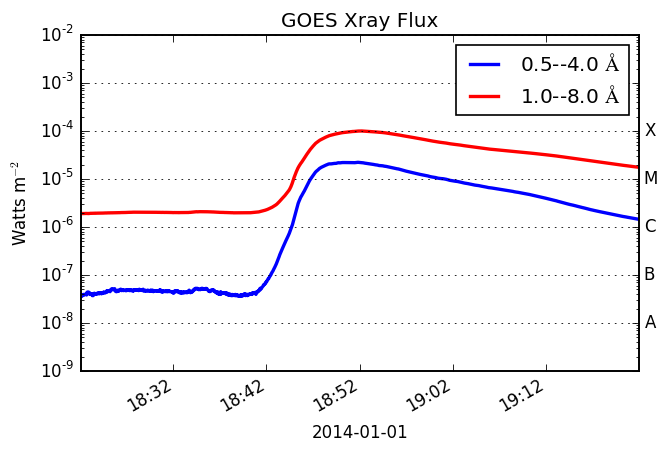

In [18]:
goes.peek()

The data is stored in a standard place

In [19]:
goes.data

,xrsa,xrsb
2014-01-01 18:22:01.801999,3.837900e-08,0.000002
2014-01-01 18:22:03.848999,3.615000e-08,0.000002
2014-01-01 18:22:05.898999,3.837900e-08,0.000002
2014-01-01 18:22:07.944999,3.726500e-08,0.000002
2014-01-01 18:22:09.994999,3.615000e-08,0.000002
2014-01-01 18:22:12.041999,3.726500e-08,0.000002
2014-01-01 18:22:14.088999,3.837900e-08,0.000002
2014-01-01 18:22:16.138999,3.726500e-08,0.000002
2014-01-01 18:22:18.184999,3.837900e-08,0.000002
2014-01-01 18:22:20.234999,3.949400e-08,0.000002


This is a pandas dataframe! Provides lots of additional functionality. For example

In [20]:
print('The max flux is ' + str(goes.data['xrsb'].max()) + ' at ' + str(goes.data['xrsb'].idxmax()))

The max flux is 0.00010024 at 2014-01-01 18:52:08.131999


Compares well to the official max from the HEK

In [21]:
print(tmax)

2014-01-01 18:52:00


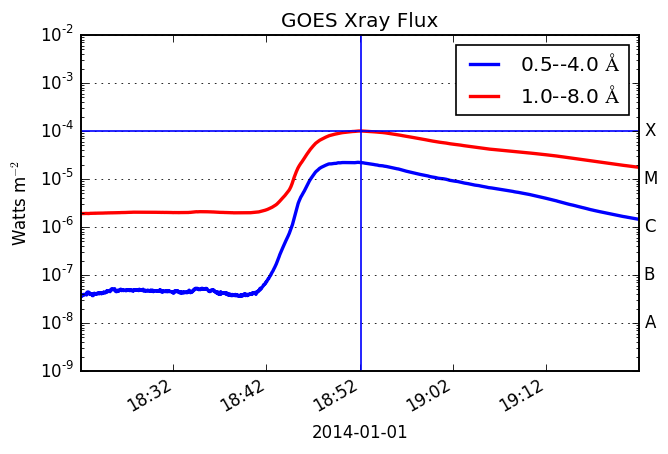

In [22]:
goes.peek()
plt.axhline(goes.data['xrsb'].max())
plt.axvline(goes.data['xrsb'].idxmax())

Meta data is also stored in a standard place

In [23]:
goes.meta

OrderedDict([('SIMPLE', True), ('BITPIX', 8), ('NAXIS', 0), ('EXTEND', True), ('DATE', '06/01/2014'), ('NUMEXT', 3), ('TELESCOP', 'GOES 15'), ('INSTRUME', 'X-ray Detector'), ('OBJECT', 'Sun'), ('ORIGIN', 'SDAC/GSFC'), ('DATE-OBS', '01/01/2014'), ('TIME-OBS', '00:00:00.000'), ('DATE-END', '01/01/2014'), ('TIME-END', '23:59:57.002'), ('COMMENT', Energy band information given in extension 1
Fluxes information given in extension 2
Status word information given in extension 3
Ref.: Solar X-Ray Measurements from SMS-1, SMS-2, and GOES-1;
Information for Data Users. Donnelly et al,  June 1977.
NOAA TM ERL SEL-48
Ref.: SMS GOES Space Environment Monitor Subsystem,
Grubb, Dec 75, NOAA, Technical Memorandum ERL SEL-42.
Ref.:Expresions to Determine Temperatures and Emission
Measures for Solar X-ray events from GOES Measurements.
Thomas et al, 1985, Solar Physics 95, pp 323-329.)])

This is a dictionary like the hek results so...

In [24]:
goes.meta.get('COMMENT')

Energy band information given in extension 1
Fluxes information given in extension 2
Status word information given in extension 3
Ref.: Solar X-Ray Measurements from SMS-1, SMS-2, and GOES-1;
Information for Data Users. Donnelly et al,  June 1977.
NOAA TM ERL SEL-48
Ref.: SMS GOES Space Environment Monitor Subsystem,
Grubb, Dec 75, NOAA, Technical Memorandum ERL SEL-42.
Ref.:Expresions to Determine Temperatures and Emission
Measures for Solar X-ray events from GOES Measurements.
Thomas et al, 1985, Solar Physics 95, pp 323-329.

In [25]:
goes.data.resample('10s', how='mean')

,xrsa,xrsb
2014-01-01 18:22:00,3.726460e-08,0.000002
2014-01-01 18:22:10,3.782200e-08,0.000002
2014-01-01 18:22:20,3.904800e-08,0.000002
2014-01-01 18:22:30,3.971680e-08,0.000002
2014-01-01 18:22:40,4.239140e-08,0.000002
2014-01-01 18:22:50,4.328300e-08,0.000002
2014-01-01 18:23:00,4.016240e-08,0.000002
2014-01-01 18:23:10,3.927080e-08,0.000002
2014-01-01 18:23:20,3.971660e-08,0.000002
2014-01-01 18:23:30,4.088675e-08,0.000002


# Solar Images in SunPy

SunPy has a `Map` type that supports 2D images, it makes it simple to read data in from any filetype supported in `sunpy.io` which is currently FITS, JPEG2000 and ANA files. You can also create maps from any `(data, metadata)` pair.

Let's download an AIA image of this flare from the vso

In [26]:
from sunpy.net import vso
client=vso.VSOClient()

Then do a search.

In [27]:
recs = client.query(vso.attrs.Time(tr), vso.attrs.Instrument('AIA'))

It works, now lets see how many results we have!

In [28]:
recs.num_records()

2400

That's way too many!
So what do we have?

In [29]:
recs.show()

Start time           End time             Source  Instrument  Type    
----------           --------             ------  ----------  ----    
2014-01-01 18:22:01  2014-01-01 18:22:02  SDO     AIA         FULLDISK
2014-01-01 18:22:02  2014-01-01 18:22:03  SDO     AIA         FULLDISK
2014-01-01 18:22:06  2014-01-01 18:22:07  SDO     AIA         FULLDISK
2014-01-01 18:22:06  2014-01-01 18:22:07  SDO     AIA         FULLDISK
2014-01-01 18:22:07  2014-01-01 18:22:08  SDO     AIA         FULLDISK
2014-01-01 18:22:08  2014-01-01 18:22:09  SDO     AIA         FULLDISK
2014-01-01 18:22:11  2014-01-01 18:22:12  SDO     AIA         FULLDISK
2014-01-01 18:22:11  2014-01-01 18:22:12  SDO     AIA         FULLDISK
2014-01-01 18:22:13  2014-01-01 18:22:14  SDO     AIA         FULLDISK
2014-01-01 18:22:14  2014-01-01 18:22:15  SDO     AIA         FULLDISK
2014-01-01 18:22:16  2014-01-01 18:22:17  SDO     AIA         FULLDISK
2014-01-01 18:22:18  2014-01-01 18:22:19  SDO     AIA         FULLDISK
2014-0

So that is every image that SDO/AIA had on that day. Let us reduce that amount.

To do this, we will limit the time search and specify a wavelength.

In [30]:
recs = client.query(vso.attrs.Time('2014/01/01 18:52:08', '2014/01/01 18:52:15'), 
                    vso.attrs.Instrument('AIA'),
                    vso.attrs.Wave(171,171))

In [31]:
recs.num_records()

1

In [32]:
recs.show()

Start time           End time             Source  Instrument  Type    
----------           --------             ------  ----------  ----    
2014-01-01 18:52:13  2014-01-01 18:52:14  SDO     AIA         FULLDISK


Let's also grab another wavelength for later.

In [33]:
recs = client.query(vso.attrs.Time('2014/01/01 18:52:08', '2014/01/01 18:52:15'), 
                    vso.attrs.Instrument('AIA'),
                    vso.attrs.Wave(94,171))

In [34]:
recs.num_records()

2

In [35]:
f = client.get(recs, methods = ('URL-FILE_Rice')).wait()

Let's load this data!

For SunPy the top level name-space is kept clean. Importing SunPy does not give you access to much. You need to import specific names. SciPy is the same. 

So, the place to start here is with the core SunPy data object. It is called Map. 

In [36]:
f

['/Users/schriste/sunpy/data/aia_lev1_131a_2014_01_01t18_52_12_49z_image_lev1_fits.0',
 '/Users/schriste/sunpy/data/aia_lev1_171a_2014_01_01t18_52_13_91z_image_lev1_fits.4']

In [37]:
from sunpy.map import Map

In [38]:
aia = Map(f[1])

In [39]:
aia

SunPy AIAMap
---------
Observatory:	 SDO
Instrument:	 AIA_3
Detector:	 AIA
Measurement:	 171
Obs Date:	 2014-01-01T18:52:13.91
dt:		 0.124214
Dimension:	 [4096, 4096]
[dx, dy] =	 [0.599489, 0.599489]

array([[ 1,  1,  1, ..., -1,  1,  0],
       [-4,  0, -1, ...,  1, -2, -1],
       [ 0,  0,  0, ...,  1,  1,  0],
       ..., 
       [ 0, -1, -2, ...,  2,  2,  0],
       [-1,  1, -2, ...,  0,  0,  0],
       [-1,  0,  1, ...,  1, -1,  2]], dtype=int16)

Maps contain both the image data and the metadata associated with the image, this metadata currently does not deviate much from the standard FITS WCS keywords, but presented in a instrument-independent manner.

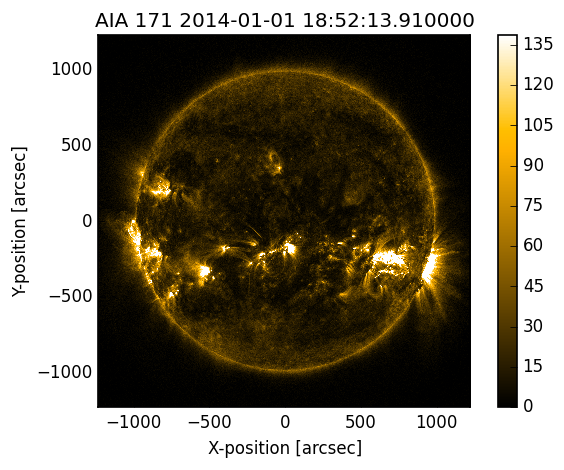

In [40]:
aia.peek()

# SunPy Maps!
Maps are the same for each file, **regardless of source**. It does not matter if the source is SDO or SOHO, for example.

The most used attributes are as follows (some of them will look similar to NumPy's Array):

In [41]:
aia.data

array([[ 1,  1,  1, ..., -1,  1,  0],
       [-4,  0, -1, ...,  1, -2, -1],
       [ 0,  0,  0, ...,  1,  1,  0],
       ..., 
       [ 0, -1, -2, ...,  2,  2,  0],
       [-1,  1, -2, ...,  0,  0,  0],
       [-1,  0,  1, ...,  1, -1,  2]], dtype=int16)

The data (stored in a numpy array)

In [42]:
type(aia.data)

numpy.ndarray

In [43]:
aia.mean(),aia.max(),aia.min()

(15.686682462692261, 10609, -7)

Because it is just a numpy array you have access to all of those function

The standard deviation

In [44]:
aia.data.std()

40.988381407247644

In [45]:
aia.data.shape

(4096, 4096)

The original metadata (stored in a dictionary)

In [46]:
aia.meta

MapMeta([('dsun_obs', 147078176337.87), ('t_obs', '2014-01-01T18:52:13.98Z'), ('datavals', 16777216), ('aimgshen', 13), ('aimshctc', 164.815994), ('aiftsid', 40961), ('gcount', 1), ('datap10', 1.0), ('roi_llx1', -2147483648), ('datap95', 49.0), ('roi_llx2', -2147483648), ('datap90', 36.0), ('aivnmst', 453), ('datap98', 79.0), ('datap99', 113.0), ('aicfgdl4', 236), ('crlt_obs', -3.084676), ('aicfgdl1', 0), ('aicfgdl2', 121), ('aicfgdl3', 185), ('totvals', 16777216), ('acs_mode', 'SCIENCE'), ('crota2', 0.019293), ('aimshobe', 68.755997), ('aimshobc', 54.779999), ('trecroun', 1), ('aihis860', 8385120), ('r_sun', 1628.195557), ('orb_rec', 'sdo.fds_orbit_vectors[2014.01.01_18:52:00_UTC]'), ('fid', 0), ('wave_str', '171_THIN'), ('datap25', 3.0), ('aecdelay', 1551), ('int_time', 0.398438), ('trecepoc', '1977.01.01_00:00:00_TAI'), ('tempsmir', 36.312), ('aimshcbc', 178.936005), ('sat_z0', 6.561608), ('lvl_num', 1.0), ('acs_safe', 'NO'), ('aimshcbe', 192.828003), ('aifoenfl', 1), ('aifdbid', 24

In [47]:
aia.meta.keys()

['dsun_obs',
 't_obs',
 'datavals',
 'aimgshen',
 'aimshctc',
 'aiftsid',
 'gcount',
 'datap10',
 'roi_llx1',
 'datap95',
 'roi_llx2',
 'datap90',
 'aivnmst',
 'datap98',
 'datap99',
 'aicfgdl4',
 'crlt_obs',
 'aicfgdl1',
 'aicfgdl2',
 'aicfgdl3',
 'totvals',
 'acs_mode',
 'crota2',
 'aimshobe',
 'aimshobc',
 'trecroun',
 'aihis860',
 'r_sun',
 'orb_rec',
 'fid',
 'wave_str',
 'datap25',
 'aecdelay',
 'int_time',
 'trecepoc',
 'tempsmir',
 'aimshcbc',
 'sat_z0',
 'lvl_num',
 'acs_safe',
 'aimshcbe',
 'aifoenfl',
 'aifdbid',
 'aimgots',
 'ctype1',
 'exptime',
 'quallev0',
 'obs_vn',
 'aiasen',
 'aifcps',
 'tempccd',
 'cdelt1',
 'cdelt2',
 'rsun_ref',
 'naxis',
 'date-obs',
 'aistate',
 'obs_vw',
 'datamean',
 'datarms',
 'obs_vr',
 'gaex_obs',
 'rsun_obs',
 'aiawvlen',
 'instrume',
 'camera',
 'blank',
 'oscnrms',
 'dn_gain',
 'oscnmean',
 'ctype2',
 'comment',
 'aihis348',
 'naxis1',
 'naxis2',
 'datakurt',
 'eff_area',
 'aifiltyp',
 'haex_obs',
 'acs_eclp',
 'agt1svy',
 'roi_nwin',
 '

In [48]:
aia.meta.get('rsun_obs')

976.085267

We also provide quick access to some key metadata values as object variables (these are shortcuts)

In [49]:
print(aia.date, aia.coordinate_system, aia.detector, aia.dsun)

('2014-01-01T18:52:13.91', {'y': 'HPLT-TAN', 'x': 'HPLN-TAN'}, 'AIA', 147078176337.87)


Maps also provide some nice map specific functions such as submaps. Let's zoom in on the flare location which was given to us by the HEK.

In [50]:
result[0].get('hpc_coord')

u'POINT(665.04 -233.4096)'

(-283.4096, -183.4096)

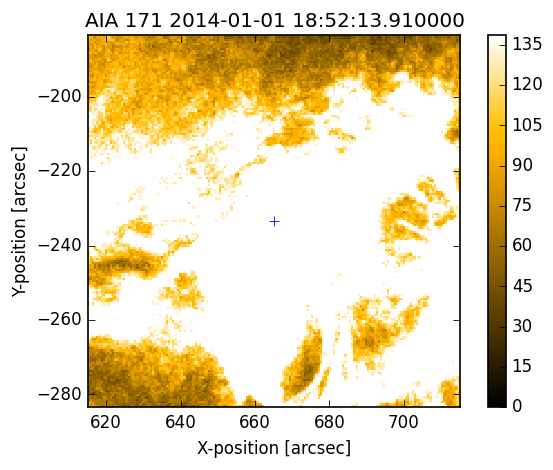

In [51]:
point = [665.04, -233.4096]
dx = 50
dy = 50
xrange = [point[0] - dx, point[0] + dx]
yrange = [point[1] - dy, point[1] + dy]
aia.submap(xrange,yrange).peek()
plt.plot(point[0], point[1], '+')
plt.xlim(xrange)
plt.ylim(yrange)

The default image scale is definitely not right. Let's fix that so we can see the flare region better.

<matplotlib.colorbar.Colorbar instance at 0x10f889ef0>

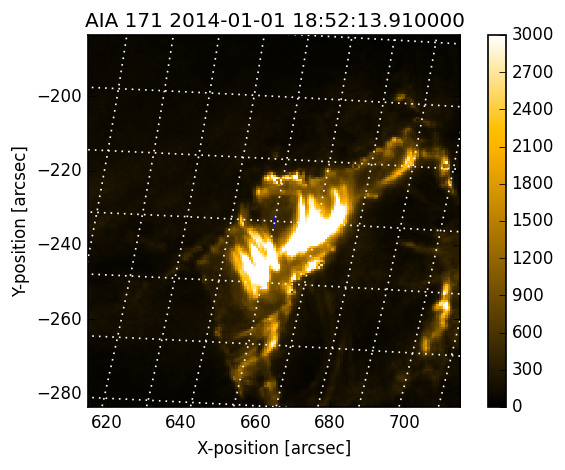

In [52]:
smap = aia.submap(xrange,yrange)

import matplotlib.colors as colors
norm = colors.Normalize(0, 3000)
smap.plot(norm=norm)
plt.plot(point[0], point[1], '+')
smap.draw_grid(grid_spacing=1)
plt.colorbar()

## Composite Maps
Let's plot the two channels we downloaded from AIA together! Composite map is the way to do this. Let's check out the other map we got.

In [53]:
aia131 = Map(f[0])
aia131

SunPy AIAMap
---------
Observatory:	 SDO
Instrument:	 AIA_1
Detector:	 AIA
Measurement:	 131
Obs Date:	 2014-01-01T18:52:12.49
dt:		 0.069832
Dimension:	 [4096, 4096]
[dx, dy] =	 [0.600698, 0.600698]

array([[-3,  0,  2, ..., -1, -1, -1],
       [ 1, -2,  0, ...,  0, -1,  0],
       [-1,  2,  1, ..., -1, -1,  0],
       ..., 
       [ 1,  1,  1, ...,  0,  0,  0],
       [-1,  0, -3, ..., -1,  1,  0],
       [ 0, -1, -1, ...,  0,  0, -3]], dtype=int16)

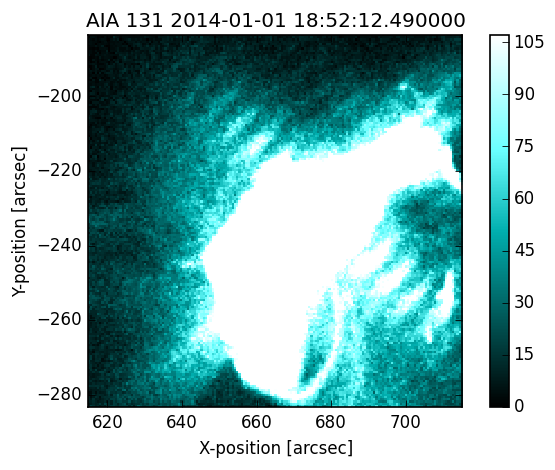

In [54]:
smap131 = aia131.submap(xrange, yrange)
smap131.peek()

In [55]:
smap171 = smap

In [56]:
compmap = Map(smap171, smap131, composite=True)

In [57]:
levels = np.arange(0,100,5)
print(levels)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [58]:
compmap.set_levels(1, levels, percent=True)
compmap.set_mpl_color_normalizer(0, norm)

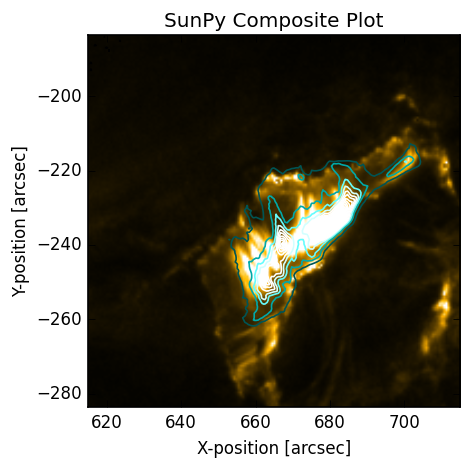

In [59]:
compmap.plot(norm=norm)
plt.show()

Some other topics...

## Solar Constants

In [60]:
from sunpy.sun import constants as solar_constants

In [61]:
solar_constants.mass

<Constant name=u'Solar mass' value=1.9891e+30 error=5e+25 units='kg' reference=u"Allen's Astrophysical Quantities 4th Ed.">

In [62]:
print(solar_constants.mass)

  Name   = Solar mass
  Value  = 1.9891e+30
  Error  = 5e+25
  Units  = kg
  Reference = Allen's Astrophysical Quantities 4th Ed.


In [63]:
(sun.mass/sun.volume).cgs

NameError: name 'sun' is not defined

In [ ]:
solar_constants.volume + solar_constants.density

Not all constants have a short-cut assigned to them (as above). The rest of the constants are stored in a dictionary. The following code grabs the dictionary and gets all of the keys.:

In [ ]:
con.physical_constants.keys()

In [ ]:
type(solar_constants.mass)

These are astropy constants which are a subclass of Quantities (numbers with units) which are a great idea.

In [ ]:
from astropy import units as u

In [ ]:
u.Gal

In [ ]:
u.Gal?

In [ ]:
u.Gal.decompose()

This has been a simple overview of AstroPy units. IF you want to read more, see http://astropy.readthedocs.org/en/latest/units/.

## More References

+ [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney is great
+ [Lectures on scientific computing with Python](http://jrjohansson.github.io) Great lectures on scientific computing in Python

## Consider [contributing](http://sunpy.org/contribute/) to SunPy!

+ Provide feedback on the [mailing list](https://groups.google.com/forum/#!forum/sunpy)
+ Report [bugs](https://github.com/sunpy/sunpy/issues)
+ Provide Code (see our [developer guide](http://sunpy.readthedocs.org/en/stable/dev.html))